<a href="https://colab.research.google.com/github/ridmirasanjalee/TreeClassifier/blob/main/Palm_classifier_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving datasetpalmclass.csv to datasetpalmclass.csv
Index(['Species', 'Length of a leaf(meters)', 'No.of leaflets in a leaf',
       'Ratio(length of leaflet:width of leaflet)', 'Leaf tip angle(degrees)'],
      dtype='object')
                          Species  Length of a leaf(meters)  \
0    Macarthuri feather palm tree                      2.77   
1              Arecanut palm tree                      0.73   
2             Christmas palm tree                      1.67   
3    Macarthuri feather palm tree                      2.37   
4              Arecanut palm tree                      2.12   
..                            ...                       ...   
470            Arecanut palm tree                      1.77   
471  Macarthuri feather palm tree                      1.81   
472           Christmas palm tree                      2.33   
473            Arecanut palm tree                      1.62   
474  Macarthuri feather palm tree                      1.69   

     No.of leaf

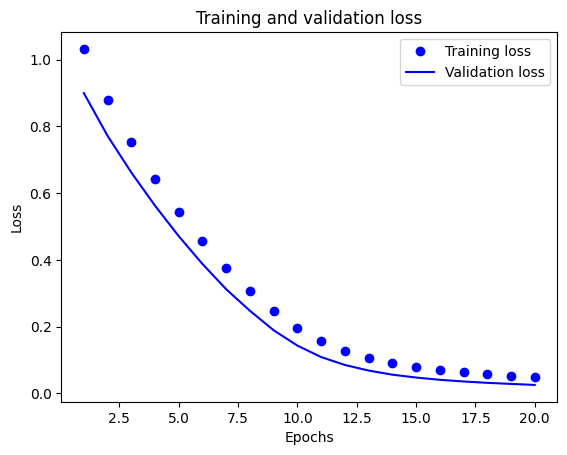

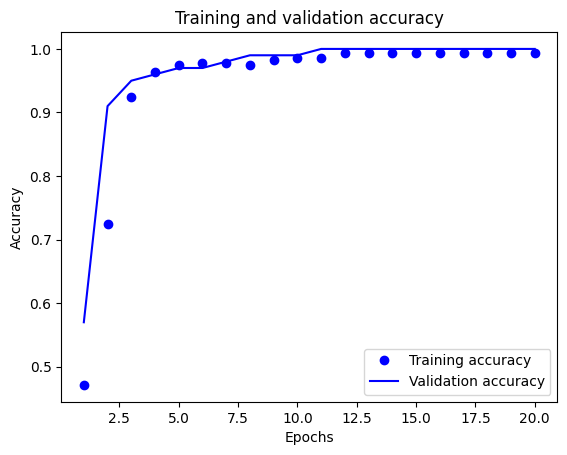

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


#df = pd.read_csv('datasetpalmcla.csv')

# Load the data
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('datasetpalmclass.csv',header=0,encoding='latin1')
print(df.columns)
df.head()
print(df)


# Assuming the first column is the label (species) and the rest are features
X = df.iloc[:, 1:]  # Features
y = df.iloc[:, 0]  # Labels

# Identify the categorical feature (Shape of the leaflet)
#categorical_feature = X.columns[5]  # Assuming the 5th column is categorical

# One-hot encode the categorical feature
#encoder = OneHotEncoder(sparse=False)
#X_categorical = pd.DataFrame(encoder.fit_transform(X[[categorical_feature]]), columns=encoder.get_feature_names_out([categorical_feature]))

# Drop the original categorical feature and concatenate with the encoded features
#X = pd.concat([X.drop(categorical_feature, axis=1), X_categorical], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the data (standardize the features)
scaler = StandardScaler()
X_train_vectorized = scaler.fit_transform(X_train)
X_test_vectorized = scaler.transform(X_test)

# Label encode the labels
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))

print(len(X_train_vectorized))
print(X_train_vectorized.shape)
print(len(X_test_vectorized))
print(X_test_vectorized.shape)
print(len(y_train_encoded))
print(y_train_encoded.shape)
print(len(y_test_encoded))
print(y_test_encoded.shape)

# Create a neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Correct way to set the learning rate
    metrics=['accuracy']
)
X_val=X_train_vectorized[:100]
partial_X_train_vectorized=X_train_vectorized[100:]
y_val=y_train_encoded[:100]
partial_y_train_encoded=y_train_encoded[100:]

print(partial_X_train_vectorized.shape)
print(partial_y_train_encoded.shape)

# Train the model with validation data
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    partial_X_train_vectorized,
    partial_y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[callback]
)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test_vectorized, y_test_encoded, verbose=0)
print(f'Test accuracy: {test_acc}')

# Extract training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Extract training and validation accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#To Re-Training Model
# Create a neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Correct way to set the learning rate
    metrics=['accuracy']
)
model.fit(
    X_train_vectorized,
    y_train_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)
results = model.evaluate(X_test_vectorized,y_test_encoded)
print(results)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

Epoch 1/20
12/12 [==============================] - 1s 21ms/step - loss: 1.0578 - accuracy: 0.5921 - val_loss: 0.9395 - val_accuracy: 0.6600
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8904 - accuracy: 0.6947 - val_loss: 0.7842 - val_accuracy: 0.8600
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.7417 - accuracy: 0.9105 - val_loss: 0.6440 - val_accuracy: 0.9500
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.9684 - val_loss: 0.5096 - val_accuracy: 0.9800
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.9842 - val_loss: 0.3875 - val_accuracy: 0.9800
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.9895 - val_loss: 0.2770 - val_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.9947 - val_loss: 0.1928 - val_accuracy: 1.0000
Epoch 8/20
12/12 [=

In [ ]:
import numpy as np

# Predict on the test data
predictions = model.predict(X_test_vectorized)

# Check the shape of the first prediction
print(predictions[0].shape)

# Verify that the sum of the probabilities for the first prediction is 1 (for a properly implemented softmax)
print(np.sum(predictions[0]))

# Get the first ten predictions
first_ten_predictions = predictions[:10]

print("First ten predictions:")
for i, prediction in enumerate(first_ten_predictions, start=1):
    print(f"Sample {i}: {prediction}")

# If you also want to see the predicted classes for the first ten samples
predicted_classes = np.argmax(predictions, axis=1)
first_ten_predicted_classes = predicted_classes[:10]

print("First ten predicted classes:")
for i, predicted_class in enumerate(first_ten_predicted_classes, start=1):
    print(f"Sample {i}: {predicted_class}")


3/3 [==============================] - 0s 4ms/step
(3,)
0.9999999
First ten predictions:
Sample 1: [0.9824533  0.00194387 0.01560272]
Sample 2: [0.99208295 0.00121646 0.00670052]
Sample 3: [0.00229162 0.9890944  0.00861404]
Sample 4: [0.02734019 0.01603547 0.9566242 ]
Sample 5: [0.00770105 0.003121   0.98917794]
Sample 6: [0.9021786  0.01033568 0.08748558]
Sample 7: [0.00313277 0.9861554  0.01071174]
Sample 8: [0.9941165  0.00135465 0.00452873]
Sample 9: [0.0026883  0.00099949 0.99631226]
Sample 10: [0.05996752 0.00281356 0.9372189 ]
First ten predicted classes:
Sample 1: 0
Sample 2: 0
Sample 3: 1
Sample 4: 2
Sample 5: 2
Sample 6: 0
Sample 7: 1
Sample 8: 0
Sample 9: 2
Sample 10: 2


In [ ]:
predictions=model.predict(X_test_vectorized)
first_ten_predictions=predictions[:10]
classes=(first_ten_predictions>0.5).astype(int)
print("Frist 10 predictions and their classified results")
for i,(prediction,cls)in enumerate(zip(first_ten_predictions,classes),start=1):
    print(f"Sample{i}:Prediction-{prediction},Classified as-{cls}")

3/3 [==============================] - 0s 3ms/step
Frist 10 predictions and their classified results
Sample1:Prediction-[0.9824533  0.00194387 0.01560272],Classified as-[1 0 0]
Sample2:Prediction-[0.99208295 0.00121646 0.00670052],Classified as-[1 0 0]
Sample3:Prediction-[0.00229162 0.9890944  0.00861404],Classified as-[0 1 0]
Sample4:Prediction-[0.02734019 0.01603547 0.9566242 ],Classified as-[0 0 1]
Sample5:Prediction-[0.00770105 0.003121   0.98917794],Classified as-[0 0 1]
Sample6:Prediction-[0.9021786  0.01033568 0.08748558],Classified as-[1 0 0]
Sample7:Prediction-[0.00313277 0.9861554  0.01071174],Classified as-[0 1 0]
Sample8:Prediction-[0.9941165  0.00135465 0.00452873],Classified as-[1 0 0]
Sample9:Prediction-[0.0026883  0.00099949 0.99631226],Classified as-[0 0 1]
Sample10:Prediction-[0.05996752 0.00281356 0.9372189 ],Classified as-[0 0 1]


In [ ]:
predictions = model.predict(X_test_vectorized)
first_ten_predictions = predictions[:10]
classes = np.argmax(first_ten_predictions, axis=1)
labels = ["Macarthuri feather palm" if cls == 0 else "Arecanut palm tree" if cls == 1 else "Christmas palm tree" for cls in classes]
print("First 10 predictions and their classified results, and labels:")
for i, (prediction, cls, label) in enumerate(zip(first_ten_predictions, classes, labels), start=1):
    print(f"Sample {i}: Prediction - {prediction}, Classified as - {cls} ({label})")

3/3 [==============================] - 0s 4ms/step
First 10 predictions and their classified results, and labels:
Sample 1: Prediction - [0.9824533  0.00194387 0.01560272], Classified as - 0 (Macarthuri feather palm)
Sample 2: Prediction - [0.99208295 0.00121646 0.00670052], Classified as - 0 (Macarthuri feather palm)
Sample 3: Prediction - [0.00229162 0.9890944  0.00861404], Classified as - 1 (Arecanut palm tree)
Sample 4: Prediction - [0.02734019 0.01603547 0.9566242 ], Classified as - 2 (Christmas palm tree)
Sample 5: Prediction - [0.00770105 0.003121   0.98917794], Classified as - 2 (Christmas palm tree)
Sample 6: Prediction - [0.9021786  0.01033568 0.08748558], Classified as - 0 (Macarthuri feather palm)
Sample 7: Prediction - [0.00313277 0.9861554  0.01071174], Classified as - 1 (Arecanut palm tree)
Sample 8: Prediction - [0.9941165  0.00135465 0.00452873], Classified as - 0 (Macarthuri feather palm)
Sample 9: Prediction - [0.0026883  0.00099949 0.99631226], Classified as - 2 (Ch

In [ ]:
# Predictions
predictions = model.predict(X_test_vectorized)

# Getting the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Printing the results
print("First 10 predictions and their classified results:")
for i, (prediction, cls) in enumerate(zip(predictions[:10], predicted_classes), start=1):
    print(f"Sample {i}: Prediction - {prediction}, Classified as class {cls}")

# Printing the class labels
labels = ["Macarthuri feather palm", "Arecanut palm tree", "Christmas palm tree"]
predicted_labels = [labels[cls] for cls in predicted_classes]
print("Predicted class labels:")
for i, label in enumerate(predicted_labels[:10], start=1):
    print(f"Sample {i}: {label}")



3/3 [==============================] - 0s 5ms/step
First 10 predictions and their classified results:
Sample 1: Prediction - [0.9824533  0.00194387 0.01560272], Classified as class 0
Sample 2: Prediction - [0.99208295 0.00121646 0.00670052], Classified as class 0
Sample 3: Prediction - [0.00229162 0.9890944  0.00861404], Classified as class 1
Sample 4: Prediction - [0.02734019 0.01603547 0.9566242 ], Classified as class 2
Sample 5: Prediction - [0.00770105 0.003121   0.98917794], Classified as class 2
Sample 6: Prediction - [0.9021786  0.01033568 0.08748558], Classified as class 0
Sample 7: Prediction - [0.00313277 0.9861554  0.01071174], Classified as class 1
Sample 8: Prediction - [0.9941165  0.00135465 0.00452873], Classified as class 0
Sample 9: Prediction - [0.0026883  0.00099949 0.99631226], Classified as class 2
Sample 10: Prediction - [0.05996752 0.00281356 0.9372189 ], Classified as class 2
Predicted class labels:
Sample 1: Macarthuri feather palm
Sample 2: Macarthuri feather 

                              precision    recall  f1-score   support

          Arecanut palm tree       1.00      1.00      1.00        41
         Christmas palm tree       1.00      1.00      1.00        27
Macarthuri feather palm tree       1.00      1.00      1.00        27

                    accuracy                           1.00        95
                   macro avg       1.00      1.00      1.00        95
                weighted avg       1.00      1.00      1.00        95



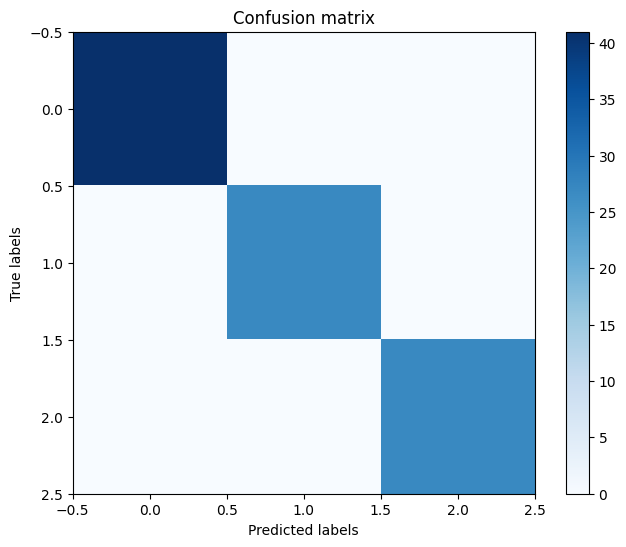

In [ ]:
# Convert predictions to labels
predicted_labels = le.inverse_transform(predictions.argmax(axis=1))

# Convert true labels to numeric format
#y_test_numeric = le.transform(y_test)

# Display classification report
print(classification_report(y_test, predicted_labels))

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix(y_test, predicted_labels), cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.show()

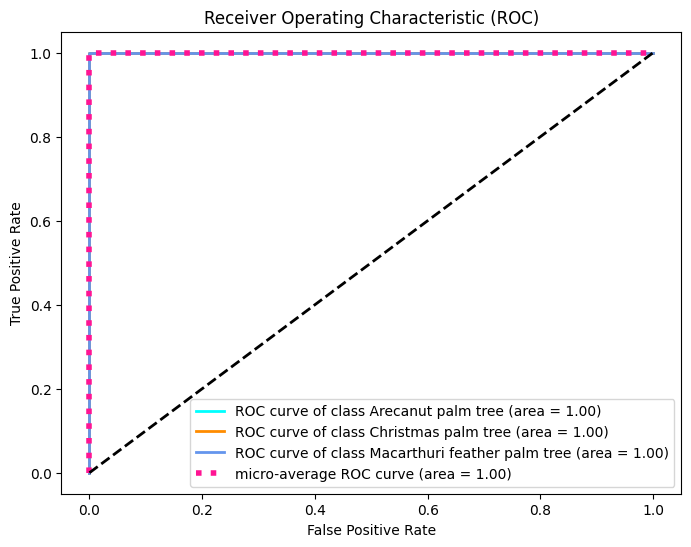

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle



# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=le.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(le.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

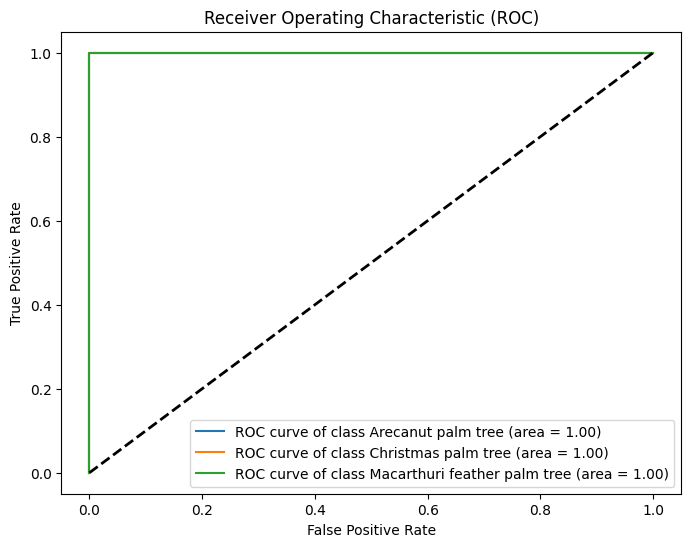

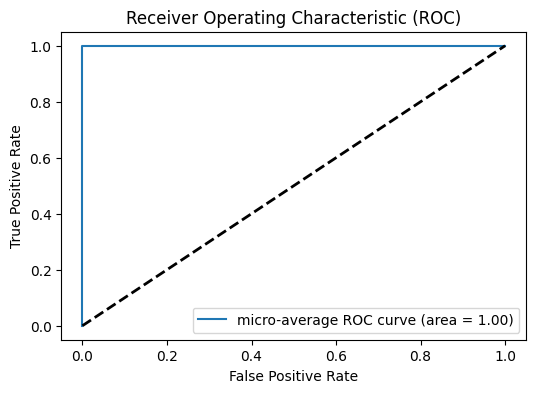

In [ ]:
# Plot AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(le.classes_[i], roc_auc[i]))

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot micro-average AUC
plt.figure(figsize=(6, 4))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall for each class with zero_division=1
recall_macarthuri = recall_score(y_test, predicted_labels, labels=[0], average=None, zero_division=1)
recall_arecanut = recall_score(y_test, predicted_labels, labels=[1], average=None, zero_division=1)
recall_christmas = recall_score(y_test, predicted_labels, labels=[2], average=None, zero_division=1)

print("Recall for Macarthuri feather palm:", recall_macarthuri)
print("Recall for Arecanut palm tree:", recall_arecanut)
print("Recall for Christmas palm tree:", recall_christmas)

Recall for Macarthuri feather palm: [1.]
Recall for Arecanut palm tree: [1.]
Recall for Christmas palm tree: [1.]
